In [1]:
import pandas as pd 
import numpy as np
import acquire as a 
import prepare as p
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, \
export_text, plot_tree
from sklearn.impute import SimpleImputer


## Acquire

Planning - Acquisition - Preparation - Exploratory Analysis - Modeling - Product Delivery

acquired the data from the acquire.py file

In [2]:
a_telco_df = a.get_telco_data()
a_telco_df.head()

this file exists, reading csv


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


## Clean Data

We notice that the type id and regular type might have relatioship to eachother, so we look into it more to see if we need it in our data . 

customer_id has the same count of unique values as our rows. so we will be removing it since it represents as an index. 

In [3]:
a_telco_df.nunique()

payment_type_id                4
internet_service_type_id       3
contract_type_id               3
customer_id                 7043
gender                         2
senior_citizen                 2
partner                        2
dependents                     2
tenure                        73
phone_service                  2
multiple_lines                 3
online_security                3
online_backup                  3
device_protection              3
tech_support                   3
streaming_tv                   3
streaming_movies               3
paperless_billing              2
monthly_charges             1585
total_charges               6531
churn                          2
contract_type                  3
internet_service_type          2
payment_type                   4
dtype: int64

In [4]:
a_telco_df.shape

(7043, 24)

cross tab type and type id columns to see if they had a relatioship between eachother which they did. 

In [20]:
pd.crosstab(a_telco_df.payment_type, a_telco_df.payment_type_id)

payment_type_id,1,2,3,4
payment_type,,,,
Bank transfer (automatic),0,0,1544,0
Credit card (automatic),0,0,0,1522
Electronic check,2365,0,0,0
Mailed check,0,1612,0,0


In [21]:
a_telco_df.payment_type.value_counts().sum()

7043

In [22]:
pd.crosstab(a_telco_df.internet_service_type, a_telco_df.internet_service_type_id)

internet_service_type_id,1,2
internet_service_type,,
DSL,2421,0
Fiber optic,0,3096


In [23]:
a_telco_df.internet_service_type.value_counts().sum()

5517

In [24]:
a_telco_df.isnull().sum()

payment_type_id                0
internet_service_type_id       0
contract_type_id               0
customer_id                    0
gender                         0
senior_citizen                 0
partner                        0
dependents                     0
tenure                         0
phone_service                  0
multiple_lines                 0
online_security                0
online_backup                  0
device_protection              0
tech_support                   0
streaming_tv                   0
streaming_movies               0
paperless_billing              0
monthly_charges                0
total_charges                  0
churn                          0
contract_type                  0
internet_service_type       1526
payment_type                   0
dtype: int64

internet service type has 1526 null values, so we will be giving it the value of No internet service.

In [25]:
pd.crosstab(a_telco_df.contract_type, a_telco_df.contract_type_id)

contract_type_id,1,2,3
contract_type,,,
Month-to-month,3875,0,0
One year,0,1473,0
Two year,0,0,1695


In [26]:
a_telco_df.contract_type.value_counts().sum()

7043

We will be dropping the Id columns from the data. 

There are 11 empty spaces in total charges, we will be changing this, by turning this whitespace to a zero since it doesn't have a value. 

In [27]:
# total_charges has 11 vaules that doesn't represent a value
a_telco_df.total_charges.value_counts()

total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64

In [77]:
a_telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_support 

Also notice that total charges is an object which will be changed to a float. 

used the prep_telco function from our prepare.py file, to make the changes to clean the data. 

In [28]:
telco_df = p.prep_telco(a_telco_df)
telco_df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


In [29]:
telco_df.total_charges.value_counts()

total_charges
0.00       11
20.20      11
19.75       9
19.90       8
20.05       8
           ..
2387.75     1
6302.80     1
2058.50     1
829.55      1
3707.60     1
Name: count, Length: 6531, dtype: int64

In [31]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  total_cha

In [78]:
telco_df.internet_service_type.value_counts()

internet_service_type
Fiber optic            3096
DSL                    2421
No internet service    1526
Name: count, dtype: int64

In [35]:
telco_df.isnull().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
contract_type            0
internet_service_type    0
payment_type             0
dtype: int64

## Splitting

The data was split in to train, val, and test datasets by usung splitting_data function in the prepar.py file. 

In [36]:
train, val, test = p.splitting_data(telco_df, 'churn')

In [37]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
2865,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,No,No,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic)
4107,Female,1,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check
3453,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,No internet service,Mailed check
923,Male,0,No,No,10,Yes,Yes,No,No,No,No,Yes,No,Yes,86.05,834.10,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
2370,Male,0,No,No,43,Yes,No,No,Yes,No,No,No,Yes,Yes,60.00,2548.55,No,Two year,DSL,Electronic check


In [79]:
val.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
328,Male,0,Yes,Yes,11,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.65,225.75,No,Two year,No internet service,Mailed check
5983,Male,0,Yes,Yes,26,Yes,Yes,No,No,No,No,Yes,No,Yes,83.75,2070.60,Yes,Month-to-month,Fiber optic,Electronic check
5551,Female,0,Yes,Yes,6,No,No phone service,No,Yes,Yes,Yes,No,No,No,40.55,217.50,No,Two year,DSL,Mailed check
6614,Male,0,No,No,3,Yes,No,No,Yes,No,No,No,No,No,74.45,221.10,No,Month-to-month,Fiber optic,Credit card (automatic)
6283,Female,0,No,No,1,Yes,No,Yes,No,No,No,No,No,No,49.55,49.55,No,Month-to-month,DSL,Bank transfer (automatic)


In [80]:
test.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4930,Female,1,Yes,No,48,Yes,No,No,Yes,No,No,No,Yes,Yes,58.95,2789.70,No,One year,DSL,Bank transfer (automatic)
117,Female,0,Yes,Yes,46,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.25,864.20,No,Two year,No internet service,Mailed check
5275,Male,0,No,No,1,Yes,Yes,No,No,No,No,No,No,Yes,49.80,49.80,No,Month-to-month,DSL,Credit card (automatic)
6364,Female,0,No,No,55,Yes,No,No,Yes,Yes,No,No,Yes,Yes,64.75,3617.10,No,Two year,DSL,Mailed check
1092,Male,1,Yes,No,51,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,93.65,4839.15,No,One year,Fiber optic,Bank transfer (automatic)


In [38]:
print(f'Prepared df: {telco_df.shape}')
print()
print(f'Train: {train.shape}')
print(f'Validate {val.shape}')
print(f'Test: {test.shape}')

Prepared df: (7043, 20)

Train: (4225, 20)
Validate (1409, 20)
Test: (1409, 20)


## Preprocessing

Changed the values of some columns to represent an interger instead of a srring value with the preprocess_telco function from the prepare.py file

In [39]:
train_encoded, val_encoded, test_encoded = p.preprocess_telco(
train, val, test)

In [40]:
train_encoded.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_No internet service,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
2865,1,38,95.00,3591.25,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
4107,1,2,70.35,139.05,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
3453,1,11,19.95,214.75,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
923,0,10,86.05,834.10,1,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,0
2370,0,43,60.00,2548.55,1,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0


## Exploratory Data Analysis

Planning - Acquisition - Preparation - Exploratory Analysis - Modeling - Product Delivery

## Hypothesis

- Does being a senior_citizen affect customer churn?

$H_0$: There is NO relatioship between senior_citizen and churn.

$H_a$: There is a relatioship between senior_citizen and churn.

alpha = 0.05

In [81]:
observed_sc = pd.crosstab(train_encoded.senior_citizen, train_encoded.churn_Yes)
observed_sc

churn_Yes,0,1
senior_citizen,,
0,2696,835
1,408,286


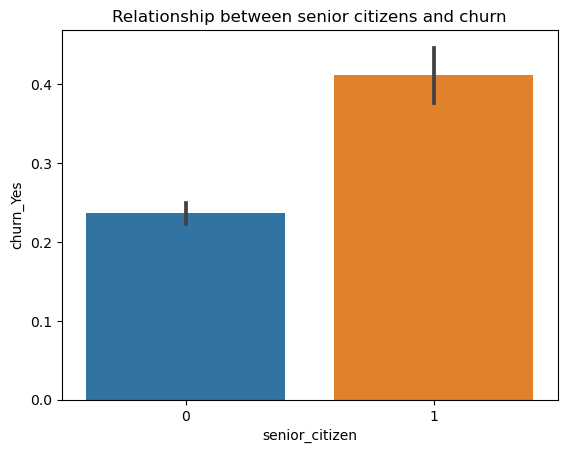

In [90]:
# Visualize
plt.title("Relationship between senior citizens and churn")
sns.barplot(data=train_encoded, x='senior_citizen', y='churn_Yes');
plt.savefig('plt_image.jpg')

In [43]:
# Analyze
chi2, p, dof, expected = stats.chi2_contingency(observed_sc)
p

1.5271938515844278e-21

P-value is less than alpha, therefore, we reject the null hypothesis.

we can conclude that there is a relationship between senior_citzen and churn.

# Summerize

we confirmed there is a relationship between senior citizen and churn:

- customers that are senior citizens are more likely to churn

- customers that are not senior citizens are less likely to churn

- senior citizens churned regardless of price being high or low. 


## Hypothesis

- Does gender affect customer churn?

$H_0$: There is NO relatioship between gender and churn.

$H_a$: There is a relatioship between gender and churn.

alpha = 0.05

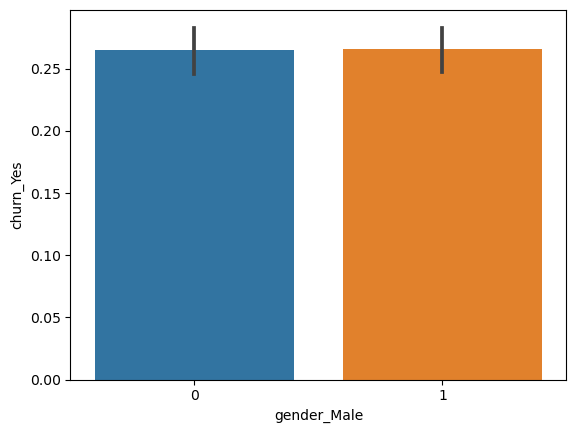

In [52]:
# Visualize
sns.barplot(data=train_encoded, x='gender_Male', y='churn_Yes');

In [53]:
observed_gm = pd.crosstab(train_encoded.gender_Male, train_encoded.churn_Yes)
observed_gm

churn_Yes,0,1
gender_Male,,
0,1550,559
1,1554,562


In [54]:
# analyze
chi2, p, dof, expected = stats.chi2_contingency(observed_gm)
p

0.996031931504371

P-value is more than alpha, therefore, we accept the null hypothesis.

we can conclude that there is NO significant relationship between gender and churn.

# Summerize

- We confirmed there is No relationship between gender and churn, but looking at the barplot we can tell that customers churn likely because they had higher charges. 


## Hypothesis

- Does having a partner affect customer churn?

$H_0$: There is NO relatioship between partner and churn.

$H_a$: There is a relatioship between partner and churn.

alpha = 0.05

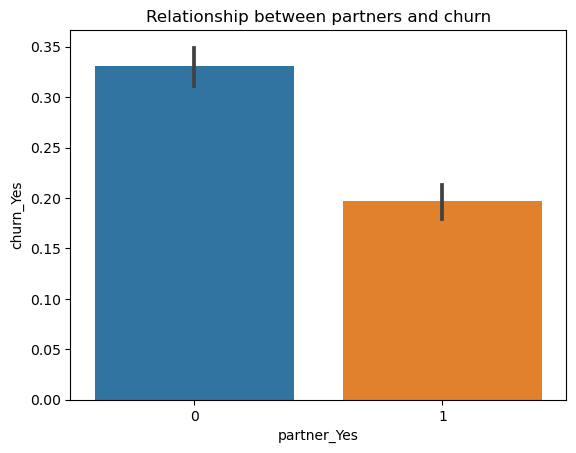

In [91]:
# Visualize
plt.title("Relationship between partners and churn")
sns.barplot(data=train_encoded, x='partner_Yes', y='churn_Yes');
plt.savefig('plt_image1.jpg')

In [56]:
observed_p = pd.crosstab(train_encoded.partner_Yes, train_encoded.churn_Yes)
observed_p

churn_Yes,0,1
partner_Yes,,
0,1445,715
1,1659,406


In [57]:
# analyze
chi2, p, dof, expected = stats.chi2_contingency(observed_p)
p

6.414706667955165e-23

My p-value is less than alpha, therefore, we reject the null hypothesis.

we can conclude that there is a relationship between partner and churn.

# Summerize

we confirmed there is a relationship between partner and churn:

- customers that have a partner are less likely to churn

- customers that do not have a partner are more likely to churn

- partnerd and unpartnered customers churned because their monthly prices were high. 

# Hypothesis

- Does dependents affect customer churn?

$H_0$: There is NO relatioship between dependent and churn.

$H_a$: There is a relatioship between dependent and churn.

alpha = 0.05

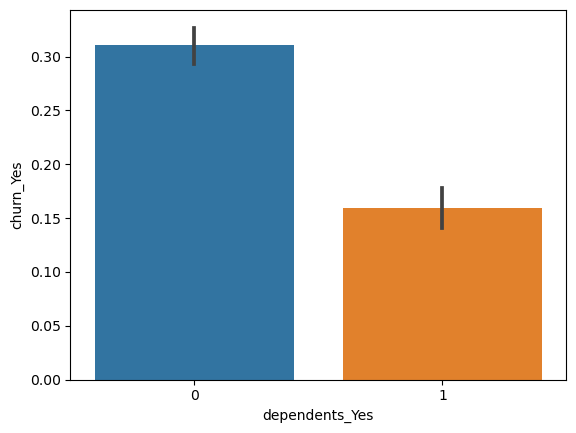

In [58]:
# Visualize
sns.barplot(data=train_encoded, x='dependents_Yes', y='churn_Yes');

In [59]:
observed_d = pd.crosstab(train_encoded.dependents_Yes, train_encoded.churn_Yes)
observed_d

churn_Yes,0,1
dependents_Yes,,
0,2042,919
1,1062,202


In [60]:
# analyze
chi2, p, dof, expected = stats.chi2_contingency(observed_d)
p

4.91325418673439e-24

My p-value is less than alpha, therefore, we reject the null hypothesis.

we can conclude that there is a relationship between dependent and churn.

# Summerize

we confirmed there is a relationship between dependents and churn:

- customers that do not have dependents are more likely to churn

- customers that do have dependents are less likely to churn




## Modeling

- Decision Tree

In [61]:
# import our models from sklearn:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression #logistic not linear!
from sklearn.neighbors import KNeighborsClassifier #pick the classifier one

In [62]:
train_encoded.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_No internet service,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
2865,1,38,95.00,3591.25,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
4107,1,2,70.35,139.05,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
3453,1,11,19.95,214.75,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
923,0,10,86.05,834.10,1,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,0
2370,0,43,60.00,2548.55,1,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0


- Split

we split our data by x and y. y has our target value where x has the remaing columns.

In [63]:
X_train = train_encoded.drop(columns='churn_Yes')
X_val = val_encoded.drop(columns='churn_Yes')
X_test = test_encoded.drop(columns='churn_Yes')

In [64]:
y_train = train_encoded.churn_Yes
y_val = val_encoded.churn_Yes
y_test = test_encoded.churn_Yes

In [65]:
X_train.columns

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'gender_Male', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'paperless_billing_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_No internet service',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check'],
      dtype='object')

In [66]:
features = ['senior_citizen', 'gender_Male', 'partner_Yes', 'dependents_Yes']

In [67]:
y_train.head()

2865    0
4107    1
3453    1
923     1
2370    0
Name: churn_Yes, dtype: int64

In [76]:
# creating the model!

tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [69]:
tree

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [70]:
tree.fit(X_train[features], y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [71]:
y_train.mode()

0    0
Name: churn_Yes, dtype: int64

In [72]:
# Our baseline
(y_train == 0).mean()

0.7346745562130178

In [73]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree.score(X_train[features], y_train)))

Accuracy of Decision Tree classifier on training set: 0.74


In [74]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(tree.score(X_val[features], y_val)))

Accuracy of Decision Tree classifier on validate set: 0.73


In [75]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(tree.score(X_test[features], y_test)))

Accuracy of Decision Tree classifier on test set: 0.73


- Random Forrest 

In [71]:
rf = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=123)
rf

RandomForestClassifier(max_depth=10, random_state=123)

In [72]:
rf.fit(X_train[features], y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [73]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train[features], y_train)))

Accuracy of random forest classifier on training set: 0.74


In [74]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_val[features], y_val)))

Accuracy of random forest classifier on validate set: 0.73


In [75]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_test[features], y_test)))

Accuracy of random forest classifier on training set: 0.73


- Logistic Regression

In [76]:
#make it
lr = LogisticRegression()

#fit it
lr.fit(X_train[features], y_train)

LogisticRegression()

In [77]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(lr.score(X_train[features], y_train)))

Accuracy of Logistic Regression classifier on training set: 0.73


In [78]:
print('Accuracy of Logistic Regression classifier on validate set: {:.2f}'
     .format(lr.score(X_val[features], y_val)))

Accuracy of Logistic Regression classifier on validate set: 0.73


In [79]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(lr.score(X_test[features], y_test)))

Accuracy of Logistic Regression classifier on test set: 0.73


## Conclusion :

- customers that are senior citizens are more likely to churn.
- we can conclude that there is NO significant relationship between gender and churn.
- customers that have a partner are less likely to churn
- customers that do not have dependents are more likely to churn

Recommendations:

- Look into why senior citizens are more likely to churn. Is it because of other companies offering better products or is it because of survival rate. If it is because of products, look into products that could benefit senior citizens more. 
- There is no significant relationship between gender and churn I recommend looking at different variable within data set. 
- For customers with no dependents or partners, what features or offers could be marketed to customers that are single. 

Given more time I would of looked into all variables on why customers are likely ro churn. 